In [1]:
!nvidia-smi
!pip install -q opencv-python-headless scikit-learn matplotlib seaborn


Tue Aug 12 06:51:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train: (50000, 32, 32, 3) (50000, 1) Test: (10000, 32, 32, 3) (10000, 1)


/tmp/ipython-input-3855174077.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[r, c*2].set_title(class_names[int(y_train[i])]+" (orig)")


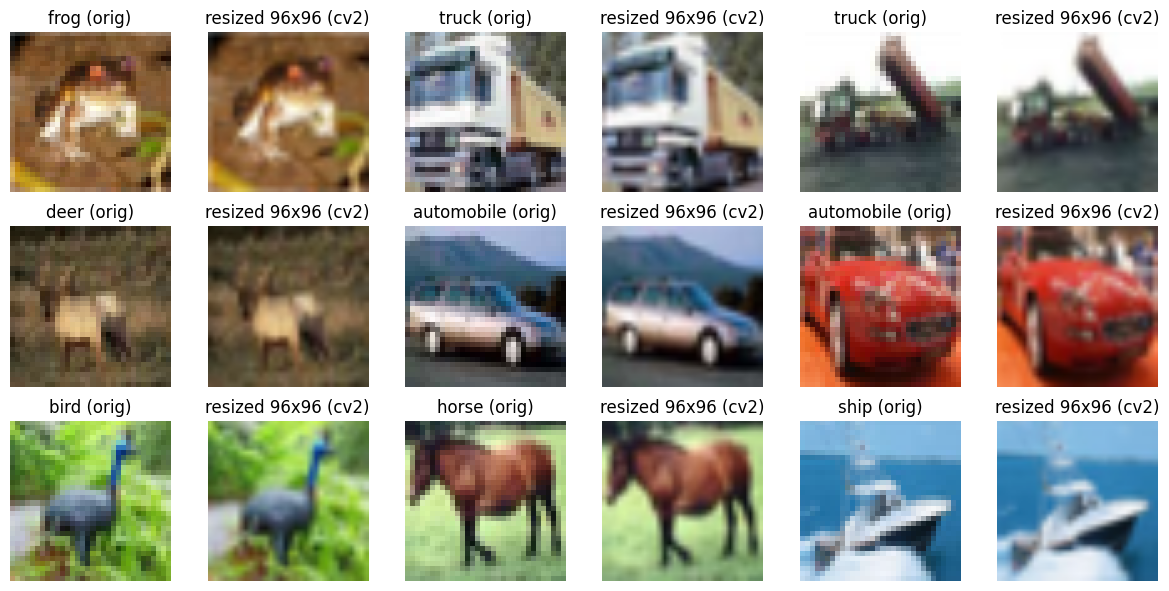

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print("Train:", x_train.shape, y_train.shape, "Test:", x_test.shape, y_test.shape)

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

fig, axs = plt.subplots(3, 6, figsize=(12,6))
for i in range(9):
    r = i // 3
    c = i % 3
    orig = (x_train[i] * 255).astype('uint8')       # still RGB order
    resized = cv2.resize(orig, (96,96), interpolation=cv2.INTER_LINEAR)
    axs[r, c*2].imshow(orig)
    axs[r, c*2].set_title(class_names[int(y_train[i])]+" (orig)")
    axs[r, c*2].axis('off')
    axs[r, c*2+1].imshow(resized)
    axs[r, c*2+1].set_title("resized 96x96 (cv2)")
    axs[r, c*2+1].axis('off')

plt.tight_layout()
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,946 (437.29 KB)

 Trainable params: 111,498 (435.54 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4098 - loss: 1.6311
Epoch 1: val_accuracy improved from -inf to 0.44740, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4099 - loss: 1.6308 - val_accuracy: 0.4474 - val_loss: 1.5430 - learning_rate: 0.0010
Epoch 2/15
695/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6082 - loss: 1.0943
Epoch 2: val_accuracy improved from 0.44740 to 0.60040, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6084 - loss: 1.0937 - val_accuracy: 0.6004 - val_loss: 1.1121 - learning_rate: 0.0010
Epoch 3/15
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6799 - loss: 0.9075
Epoch 3: val_accuracy did not improve from 0.60040
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6799 - loss: 0.9075 - val_accuracy: 0.5060 - val_loss: 1.4418 - learning_rate: 0.0010
Epoch 4/15
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7223 - loss: 0.8000
Epoch 4: val_accuracy improved from 0.60040 to 0.68020, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7223 - loss: 0.7999 - val_accuracy: 0.6802 - val_loss: 0.9054 - learning_rate: 0.0010
Epoch 5/15
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7525 - loss: 0.7140
Epoch 5: val_accuracy improved from 0.68020 to 0.70160, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7525 - loss: 0.7140 - val_accuracy: 0.7016 - val_loss: 0.8604 - learning_rate: 0.0010
Epoch 6/15
695/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7732 - loss: 0.6526
Epoch 6: val_accuracy did not improve from 0.70160
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7732 - loss: 0.6526 - val_accuracy: 0.6890 - val_loss: 0.8630 - learning_rate: 0.0010
Epoch 7/15
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7956 - loss: 0.5902
Epoch 7: val_accuracy improved from 0.70160 to 0.74780, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7956 - loss: 0.5903 - val_accuracy: 0.7478 - val_loss: 0.7445 - learning_rate: 0.0010
Epoch 8/15
696/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8068 - loss: 0.5599
Epoch 8: val_accuracy did not improve from 0.74780
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8067 - loss: 0.5600 - val_accuracy: 0.7356 - val_loss: 0.8013 - learning_rate: 0.0010
Epoch 9/15
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8199 - loss: 0.5163
Epoch 9: val_accuracy did not improve from 0.74780

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8199 - loss: 0.5163 - val_accuracy: 0.7066 - val_loss: 0.8655 - learning_rate: 0.0010
Epoch 10/15
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8519 - loss: 0.4279
Epoch 10: val_accuracy improved from 0.74780 to 0.77520, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8519 - loss: 0.4279 - val_accuracy: 0.7752 - val_loss: 0.6607 - learning_rate: 5.0000e-04
Epoch 11/15
697/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8678 - loss: 0.3805
Epoch 11: val_accuracy improved from 0.77520 to 0.78760, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8678 - loss: 0.3806 - val_accuracy: 0.7876 - val_loss: 0.6631 - learning_rate: 5.0000e-04
Epoch 12/15
694/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8794 - loss: 0.3506
Epoch 12: val_accuracy did not improve from 0.78760

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8793 - loss: 0.3507 - val_accuracy: 0.7398 - val_loss: 0.7915 - learning_rate: 5.0000e-04
Epoch 13/15
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8985 - loss: 0.2988
Epoch 13: val_accuracy improved from 0.78760 to 0.80040, saving model to best_model.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8985 - loss: 0.2988 - val_accuracy: 0.8004 - val_loss: 0.6245 - learning_rate: 2.5000e-04
Epoch 14/15
696/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9076 - loss: 0.2753
Epoch 14: val_accuracy did not improve from 0.80040
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9076 - loss: 0.2754 - val_accuracy: 0.7890 - val_loss: 0.6812 - learning_rate: 2.5000e-04
Epoch 15/15
699/704 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9116 - loss: 0.2580
Epoch 15: val_accuracy did not improve from 0.80040

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9116 - loss: 0.2581 - val_accuracy: 0.7850 - val_loss: 0.6746 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 13.


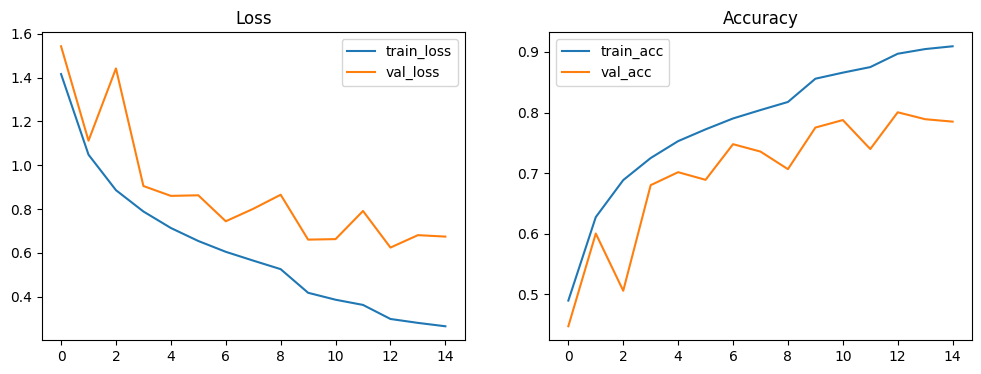

In [3]:
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

num_classes = 10
input_shape = x_train.shape[1:]

def create_basic_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_basic_cnn(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint = callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy',
    save_best_only=True, mode='max', verbose=1
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=3,
    restore_best_weights=True, verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.6821 - loss: 0.9968 - val_accuracy: 0.7596 - val_loss: 0.7090
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7078 - loss: 0.8597 - val_accuracy: 0.7578 - val_loss: 0.7539
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7146 - loss: 0.8381 - val_accuracy: 0.7405 - val_loss: 0.8326
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7184 - loss: 0.8180 - val_accuracy: 0.7385 - val_loss: 0.7782
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7271 - loss: 0.7967 - val_accuracy: 0.7721 - val_loss: 0.6761
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7320 - loss: 0.7850 - val_accuracy: 0.7765 - val_loss: 0.6654
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7330 - loss: 0.7781 - val_accuracy: 0.7400 - val_loss: 0.7920
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7383 - loss: 0.76

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


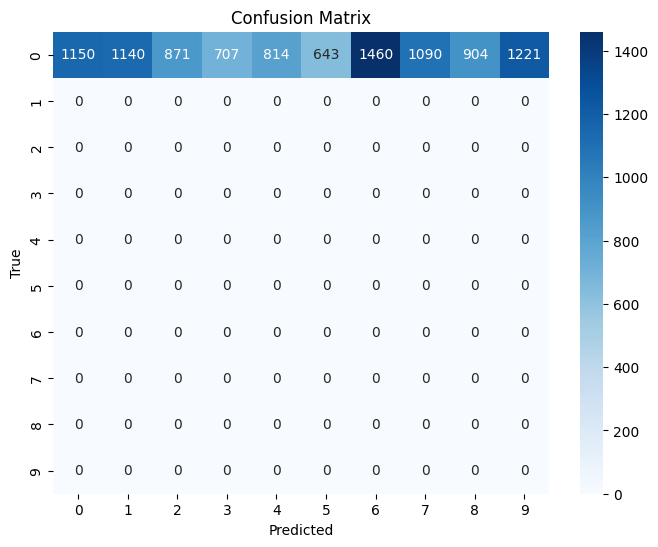

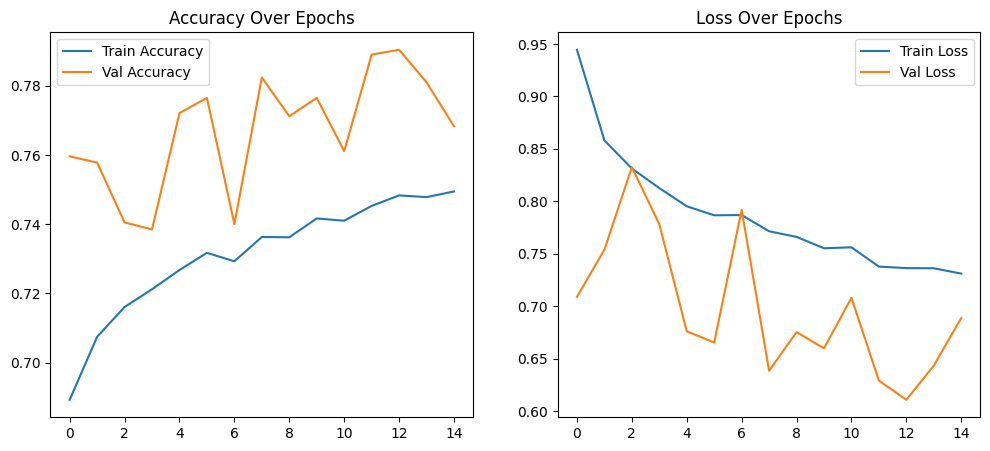

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)

history_aug = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(x_test, y_test),
    verbose=1
)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


/tmp/ipython-input-1615829627.py:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.2435 - loss: 2.0730 - val_accuracy: 0.3151 - val_loss: 1.8834
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3202 - loss: 1.8821 - val_accuracy: 0.3272 - val_loss: 1.8517
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3283 - loss: 1.8475 - val_accuracy: 0.3373 - val_loss: 1.8332
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3377 - loss: 1.8246 - val_accuracy: 0.3440 - val_loss: 1.8193
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3401 - loss: 1.8155 - val_accuracy: 0.3478 - val_loss: 1.8137
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.1395 - loss: 11.0613 - val_accuracy: 0.1630 - val_loss: 6.3955
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2003 - loss: 3.7319 - val_accuracy: 0.1632 - val_loss: 2.8943
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step -

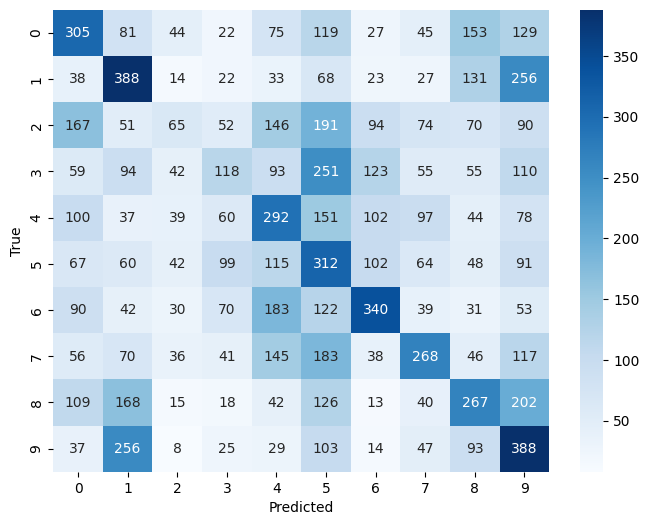

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=5,
    batch_size=64
)

base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=5,
    batch_size=64
)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.3027 - loss: 1.8960 - val_accuracy: 0.5150 - val_loss: 1.3388
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.4643 - loss: 1.4828 - val_accuracy: 0.5807 - val_loss: 1.1906
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5168 - loss: 1.3472 - val_accuracy: 0.6054 - val_loss: 1.1060
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5483 - loss: 1.2662 - val_accuracy: 0.6293 - val_loss: 1.0551
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5637 - loss: 1.2274 - val_accuracy: 0.6239 - val_loss: 1.0513
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5816 - loss: 1.1743 - val_accuracy: 0.6516 - val_loss: 0.9981
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5956 - loss: 1.1410 - val_accuracy: 0.6556 - val_loss: 0.9785
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6028 - loss: 1.1229 - val_accurac

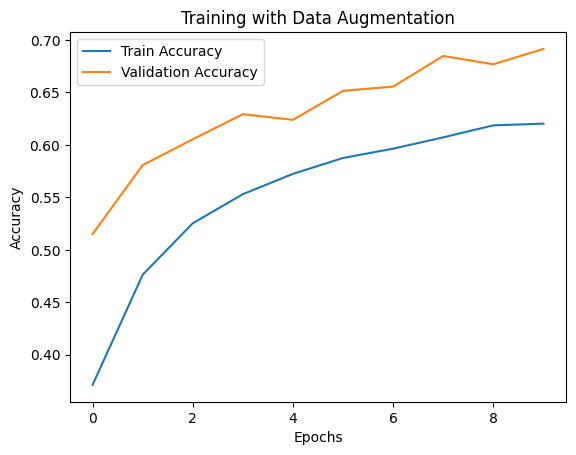

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history_aug = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test_cat)
)

# Plot accuracy
plt.plot(history_aug.history["accuracy"], label="Train Accuracy")
plt.plot(history_aug.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training with Data Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3483 - loss: 1.7481 - val_accuracy: 0.5471 - val_loss: 1.2616
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5709 - loss: 1.2115 - val_accuracy: 0.6074 - val_loss: 1.1032
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6276 - loss: 1.0557 - val_accuracy: 0.6147 - val_loss: 1.0974
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6647 - loss: 0.9538 - val_accuracy: 0.6605 - val_loss: 0.9621
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6881 - loss: 0.8823 - val_accuracy: 0.6591 - val_loss: 0.9598
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7102 - loss: 0.8176 - val_accuracy: 0.6899 - val_loss: 0.9089
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7350 - loss: 0.7555 - val_accuracy: 0.6832 - val_loss: 0.9244
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7486 - loss: 0.716

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.7008 - loss: 0.9652

Test Loss: 0.9652
Test Accuracy: 70.08%


In [10]:
# Step 8 – Improve model performance

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Data augmentation for better generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Build an improved CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train with fewer epochs (20)
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    steps_per_epoch=len(x_train) // 64,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 49s 48ms/step - accuracy: 0.3404 - loss: 2.0766 - val_accuracy: 0.5245 - val_loss: 1.3643
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5938 - loss: 1.1686

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 1.1686 - val_accuracy: 0.5259 - val_loss: 1.3563
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5571 - loss: 1.2354 - val_accuracy: 0.6334 - val_loss: 1.0395
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6562 - loss: 0.9808 - val_accuracy: 0.6358 - val_loss: 1.0351
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.6381 - loss: 1.0261 - val_accuracy: 0.6878 - val_loss: 0.9419
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5781 - loss: 1.1396 - val_accuracy: 0.6849 - val_loss: 0.9528
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.6835 - loss: 0.9157 - val_accuracy: 0.7066 - val_loss: 0.8657
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7344 - loss: 0.7779 - val_accuracy: 0.7048 - val_loss: 0.8785
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7079 - loss: 0.8420 - val_accuracy: 0.720

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 1s - 3ms/step - accuracy: 0.8005 - loss: 0.5838
Final Test Loss: 0.5838
Final Test Accuracy: 80.05%


In [12]:
model.save("cifar10_model.h5")
print("Model saved as cifar10_model.h5")

from tensorflow.keras.models import load_model
loaded_model = load_model("cifar10_model.h5")

loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded model accuracy: {accuracy * 100:.2f}%")


Model saved as cifar10_model.h5


Loaded model accuracy: 80.05%


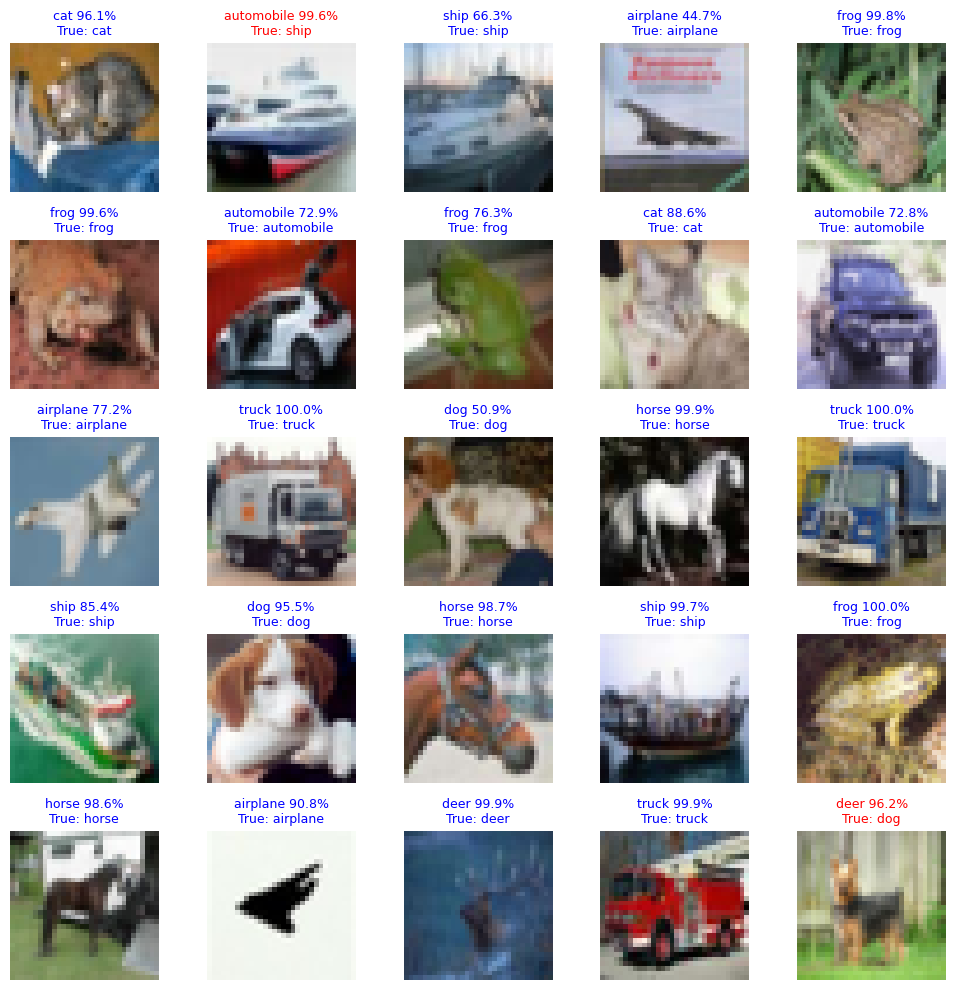

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

N = 25  # number of images to show (5x5)
imgs = x_test[:N]

# Predict in one batch (quiet)
preds = model.predict(imgs, verbose=0)

plt.figure(figsize=(10,10))
for i in range(N):
    plt.subplot(5, 5, i+1)
    img = imgs[i]

    # Decode true label robustly (works for integer labels or one-hot)
    true = y_test[i]
    if isinstance(true, np.ndarray):
        if true.ndim == 0:
            true_label = int(true)
        elif true.ndim == 1:
            # one-hot or shape (1,)
            if true.shape[0] > 1:
                true_label = int(np.argmax(true))
            else:
                true_label = int(true[0])
        else:
            true_label = int(np.argmax(true))
    else:
        true_label = int(true)

    # Predicted label and confidence
    pred_probs = preds[i]
    pred_label = int(np.argmax(pred_probs))
    confidence = float(np.max(pred_probs)) * 100.0

    color = 'blue' if pred_label == true_label else 'red'

    # Show image (CIFAR-10 images are 32x32x3)
    plt.imshow(img)
    plt.title(f"{class_names[pred_label]} {confidence:.1f}%\nTrue: {class_names[true_label]}", color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()


✅ Model loaded successfully!
📊 Final Test Accuracy: 80.05%
📉 Final Test Loss: 0.5838
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


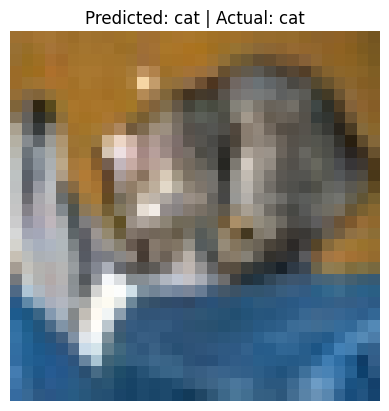

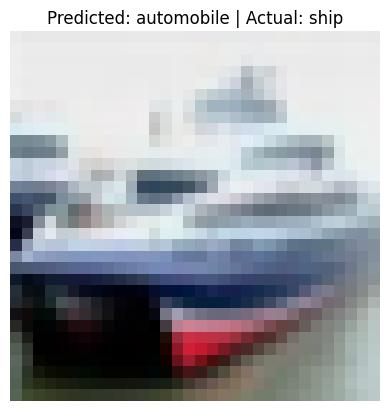

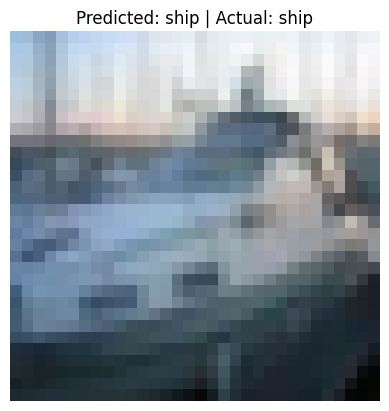

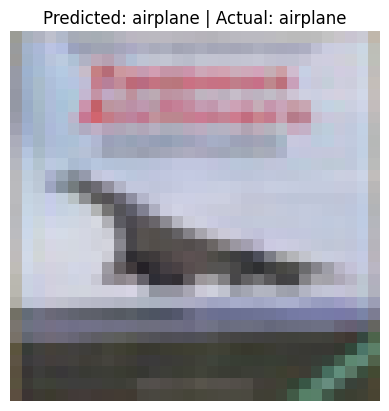

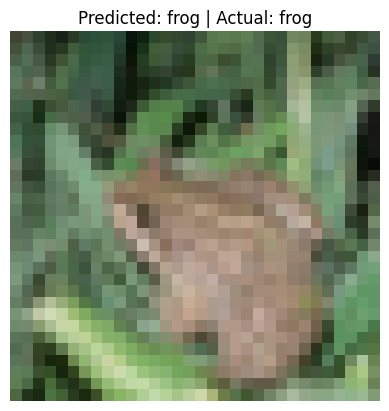

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

# Load CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load dataset for testing
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32') / 255.0

# One-hot encode y_test for evaluation
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


# Load saved model
model = load_model("cifar10_model.h5")

# Recompile the model with the correct loss function for one-hot encoded labels
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

print("✅ Model loaded and recompiled successfully!")

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"📊 Final Test Accuracy: {test_acc*100:.2f}%")
print(f"📉 Final Test Loss: {test_loss:.4f}")

# Make predictions on first 5 images
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Show predictions
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[predicted_labels[i]]} | Actual: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()